In [23]:
import matplotlib.pyplot as plt
import csv
import typing
import numpy as np
# recording 60 seconds of data
TIME = 60
START = 316

In [24]:
# get the average of the data
def readData(f : typing.TextIO):
    
    data_sum = np.zeros(60)
    data_count = np.zeros(60)

    reader = csv.reader(f, delimiter=',')
    for r in reader:
        time = int(float(r[0]))
        data = float(r[1])

        if time < START + TIME:
            data_sum[time - START] += data
            data_count[time - START] += 1

    return np.divide(data_sum, data_count)

In [25]:
# open file
s1_data = None
s2_data = None
s3_data = None

with open("s1_data.txt", "r") as s1, \
     open("s3_data.txt", "r") as s3, \
     open("s4_data.txt", "r") as s4 :

    s1_data = readData(s1)
    s3_data = readData(s3)
    s4_data = readData(s4)

In [26]:
def plot(data, switchNum):
    # insert plot
    plt.scatter(np.linspace(0, TIME - 1, num= TIME), data)
    plt.xlabel('time (seconds)') 
    plt.ylabel('avg hop_latency') 
    
    # displaying the title
    plt.title(f"average hop_latency vs time for at switch {switchNum} with background packet rate of 1M per seconds")
    plt.show()

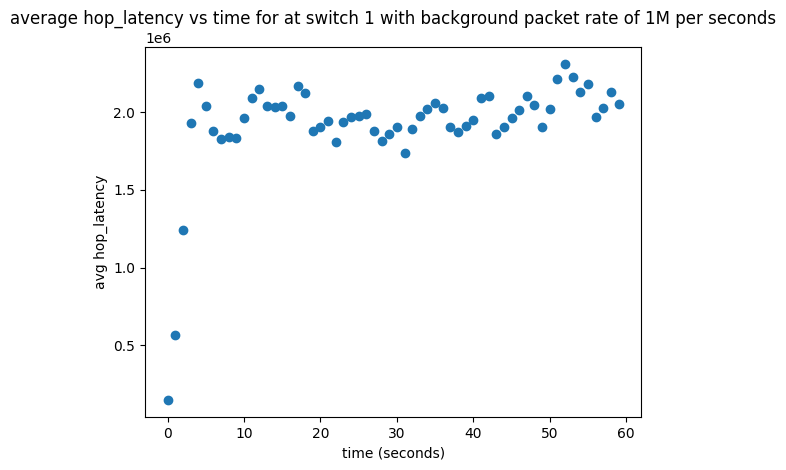

In [27]:
plot(s1_data, 1)


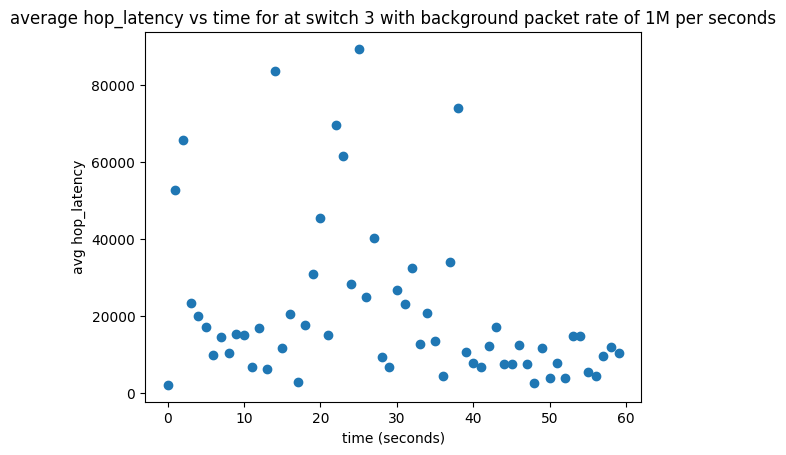

In [28]:
plot(s3_data, 3)


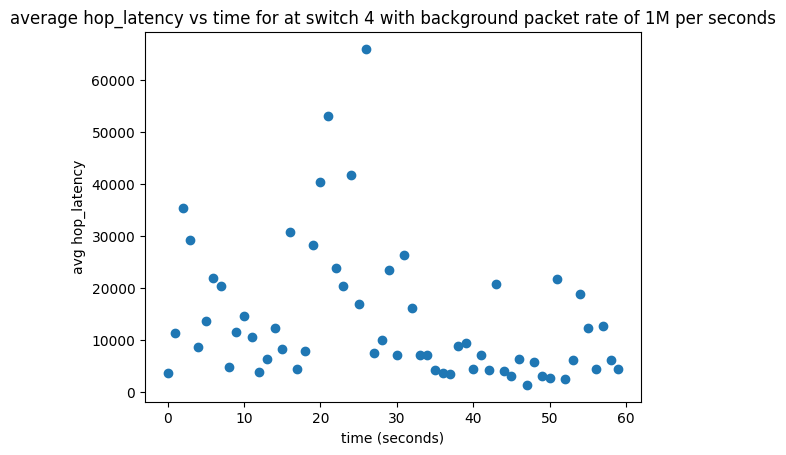

In [29]:
plot(s4_data, 4)